In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrival      ")
print("-----------------------------")

# Create counters.
record_count = 1 
set_count = 1

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39e685c6310e15cb3c572dc93c3701ef


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39e685c6310e15cb3c572dc93c3701ef&q=Boston


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrival      ")
print("-----------------------------")

# Create counters.
record_count = 1 
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50) :
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count +=1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrival      
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | afgoye
City not found. Skipping...
Processing Record 3 of Set 1 | katobu
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | jinchengjiang
City not found. Skipping...
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | kendari
Processing Record 8 of Set 1 | voyinka
Processing Record 9 of Set 1 | damietta
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | manicore
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | kikwit
Processing Record 16 of Set 1 | puerto lumbreras
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | spasskoye
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | tumannyy
City not found. Skipping...


Processing Record 36 of Set 4 | zlitan
Processing Record 37 of Set 4 | saint george
Processing Record 38 of Set 4 | dzhida
Processing Record 39 of Set 4 | qandala
Processing Record 40 of Set 4 | brae
Processing Record 41 of Set 4 | xiaoshi
Processing Record 42 of Set 4 | woodland
Processing Record 43 of Set 4 | maragogi
Processing Record 44 of Set 4 | provideniya
Processing Record 45 of Set 4 | kilinochchi
Processing Record 46 of Set 4 | ust-kamchatsk
City not found. Skipping...
Processing Record 47 of Set 4 | kormilovka
Processing Record 48 of Set 4 | paita
Processing Record 49 of Set 4 | ancud
Processing Record 50 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 1 of Set 5 | varkkallai
Processing Record 2 of Set 5 | gornoye loo
Processing Record 3 of Set 5 | kruisfontein
Processing Record 4 of Set 5 | rapallo
Processing Record 5 of Set 5 | tarudant
City not found. Skipping...
Processing Record 6 of Set 5 | pochutla
Processing Record 7 of Set 5 | aklavik
Proce

Processing Record 27 of Set 8 | zhaotong
Processing Record 28 of Set 8 | ylivieska
Processing Record 29 of Set 8 | souillac
Processing Record 30 of Set 8 | santa cruz cabralia
Processing Record 31 of Set 8 | puerto cabezas
Processing Record 32 of Set 8 | ribeira brava
Processing Record 33 of Set 8 | general roca
Processing Record 34 of Set 8 | arawa
Processing Record 35 of Set 8 | corn island
Processing Record 36 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 37 of Set 8 | pueblo
Processing Record 38 of Set 8 | hasaki
Processing Record 39 of Set 8 | coahuayana
Processing Record 40 of Set 8 | bara
Processing Record 41 of Set 8 | agutaya
Processing Record 42 of Set 8 | ayagoz
Processing Record 43 of Set 8 | okhotsk
Processing Record 44 of Set 8 | noumea
Processing Record 45 of Set 8 | coihaique
Processing Record 46 of Set 8 | mount isa
Processing Record 47 of Set 8 | san lawrenz
Processing Record 48 of Set 8 | sogdiondon
City not found. Skipping...
Processing Record

Processing Record 17 of Set 12 | langsa
Processing Record 18 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 19 of Set 12 | flinders
Processing Record 20 of Set 12 | borovoy
Processing Record 21 of Set 12 | fortuna
Processing Record 22 of Set 12 | hami
Processing Record 23 of Set 12 | san rafael
Processing Record 24 of Set 12 | labutta
City not found. Skipping...
Processing Record 25 of Set 12 | innisfail
Processing Record 26 of Set 12 | akureyri
Processing Record 27 of Set 12 | libreville
Processing Record 28 of Set 12 | telenesti
Processing Record 29 of Set 12 | sorland
Processing Record 30 of Set 12 | san ramon
Processing Record 31 of Set 12 | khorinsk
Processing Record 32 of Set 12 | pontianak
Processing Record 33 of Set 12 | douentza
Processing Record 34 of Set 12 | malartic
Processing Record 35 of Set 12 | tiruchchendur
Processing Record 36 of Set 12 | shimoda
Processing Record 37 of Set 12 | cordele
Processing Record 38 of Set 12 | rudbar
Processing Record 39

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,79.99,80,73,18.21,PF,2021-02-07 01:50:35
1,Katobu,-4.9408,122.5276,84.87,72,100,4.74,ID,2021-02-07 01:54:00
2,Albany,42.6001,-73.9662,25.00,48,0,2.01,US,2021-02-07 01:50:41
3,Puerto Ayora,-0.7393,-90.3518,77.00,94,66,6.76,EC,2021-02-07 01:54:01
4,Kendari,-3.9450,122.4989,85.89,68,100,2.30,ID,2021-02-07 01:54:01
5,Voyinka,45.8699,33.9914,29.68,86,96,8.19,UA,2021-02-07 01:54:01
6,Damietta,31.4165,31.8133,59.00,88,20,5.75,EG,2021-02-07 01:54:01
7,Butaritari,3.0707,172.7902,80.98,81,71,20.78,KI,2021-02-07 01:54:01
8,Torbay,47.6666,-52.7314,42.80,93,75,24.16,CA,2021-02-07 01:54:02
9,Rikitea,-23.1203,-134.9692,78.85,65,100,10.00,PF,2021-02-07 01:54:02


In [22]:
# Reordering columns
weather_data = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[weather_data]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-02-07 01:50:35,-9.8000,-139.0333,79.99,80,73,18.21
1,Katobu,ID,2021-02-07 01:54:00,-4.9408,122.5276,84.87,72,100,4.74
2,Albany,US,2021-02-07 01:50:41,42.6001,-73.9662,25.00,48,0,2.01
3,Puerto Ayora,EC,2021-02-07 01:54:01,-0.7393,-90.3518,77.00,94,66,6.76
4,Kendari,ID,2021-02-07 01:54:01,-3.9450,122.4989,85.89,68,100,2.30
...,...,...,...,...,...,...,...,...,...
561,Lahij,YE,2021-02-07 01:55:46,13.1667,44.5833,66.07,79,80,1.99
562,Port Augusta,AU,2021-02-07 01:51:18,-32.5000,137.7667,75.99,60,75,16.11
563,Egvekinot,RU,2021-02-07 01:55:46,66.3167,-179.1667,-4.58,78,0,7.81
564,Sicamous,CA,2021-02-07 01:55:46,50.8331,-118.9856,37.40,52,100,4.61


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

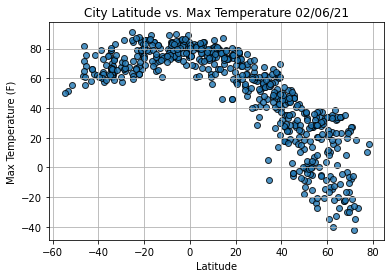

In [26]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incororpate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

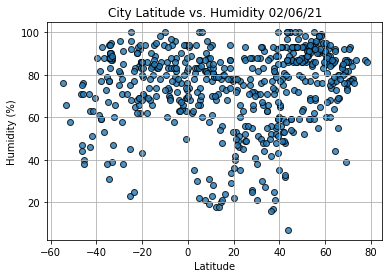

In [31]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incororpate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

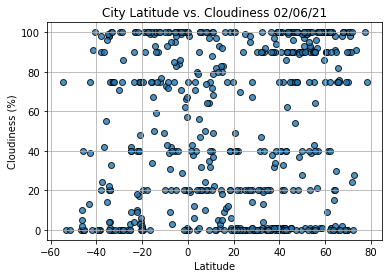

In [32]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incororpate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

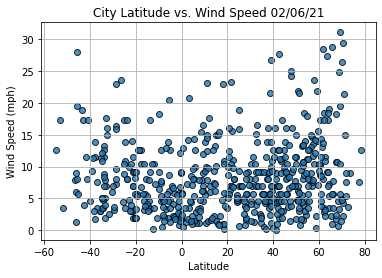

In [33]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incororpate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
index13 = city_data_df.loc[13]
index13

City             Puerto Lumbreras
Country                        ES
Date          2021-02-07 01:54:02
Lat                       37.5633
Lng                       -1.8097
Max Temp                       50
Humidity                       83
Cloudiness                     32
Wind Speed                   8.99
Name: 13, dtype: object

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Albany,US,2021-02-07 01:50:41,42.6001,-73.9662,25.00,48,0,2.01
5,Voyinka,UA,2021-02-07 01:54:01,45.8699,33.9914,29.68,86,96,8.19
6,Damietta,EG,2021-02-07 01:54:01,31.4165,31.8133,59.00,88,20,5.75
7,Butaritari,KI,2021-02-07 01:54:01,3.0707,172.7902,80.98,81,71,20.78
8,Torbay,CA,2021-02-07 01:54:02,47.6666,-52.7314,42.80,93,75,24.16


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

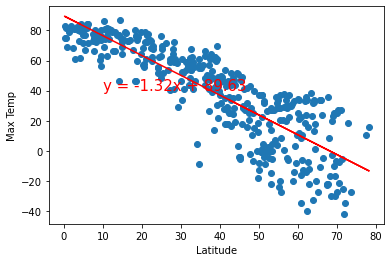

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

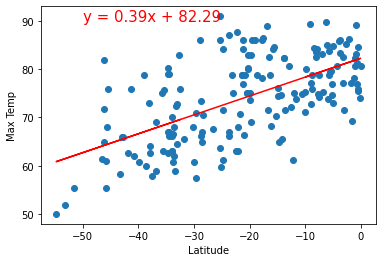

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

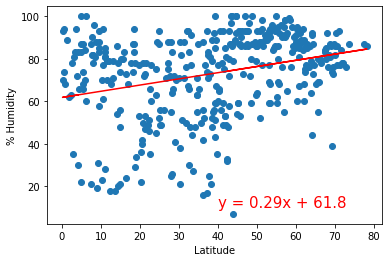

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

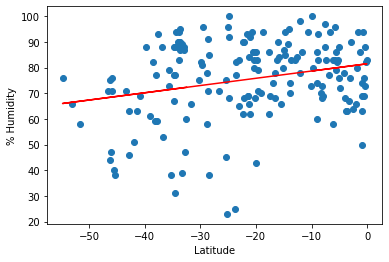

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \
                       for % Humidity", "% Humidity", (-50, 15))

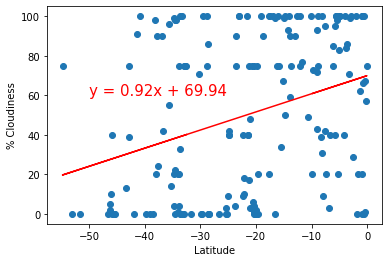

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50, 60))

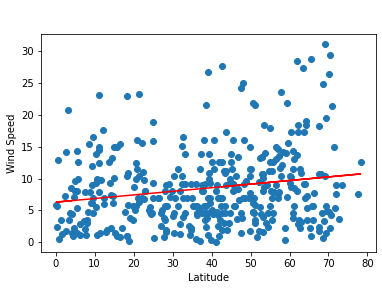

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

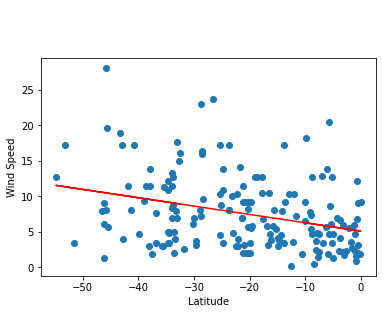

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))